In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 6s 1us/step


8


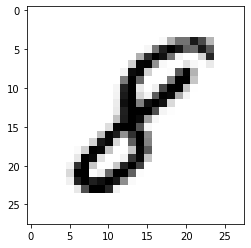

In [4]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [14]:
# Importing the required Keras modules containing model and layers
tf.keras.backend.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
# model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten(input_shape=input_shape)) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [21]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0182 - acc: 0.9935
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0173 - acc: 0.9939
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0184 - acc: 0.9938
Epoch 4/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0180 - acc: 0.9939
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0174 - acc: 0.9940
Epoch 6/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0189 - acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0160 - acc: 0.9948
Epoch 8/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0173 - acc: 0.9944
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0167 - acc: 0.9943
Epoch 10/10
60000/60000 [==============================] - 4s 71us/sample - loss:

In [19]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 81us/sample - loss: 0.0768 - acc: 0.9814


[0.07676842941369541, 0.9814]

2


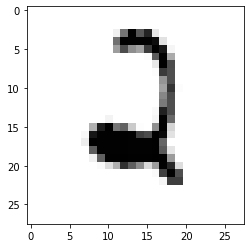

In [11]:
image_index = 4445
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [16]:
model.get_weight()

AttributeError: 'Sequential' object has no attribute 'get_weight'